# 四种天气图片的分类和预训练网络VGG16

**预训练网络：**
预训练网络是使用大型数据集（如ImageNet）训练的神经网络，这些数据集包含数百万个图像和标签。预训练网络已经学习到了许多有用的特征，这些特征可以用于各种计算机视觉任务，如分类、检测和分割。 
如果原始数据集足够大且足够通用，那么预训练网络学到的特征的空间层次可以作为有效的提取视觉世界特征的模型，可以很好地泛化到新的任务上。  
即使新问题和新任务与原始任务不同，模型学习到的特征在不同的问题之间是可迁移的。  

**VGG：**
VGG网络是由牛津大学的Visual Geometry Group提出的，是一种基于卷积神经网络的深度学习模型。VGG网络的特点是使用了小尺寸的卷积核和较深的网络结构，从而在保持计算效率的同时提高了模型的性能。VGG网络在ImageNet数据集上的表现非常出色，是当时最先进的模型之一。
**VGG16：**
VGG16网络是VGG网络的一个变体，它使用了16层的卷积神经网络结构。VGG16网络的结构非常简单，只使用了3x3的卷积核和2x2的最大池化层，这使得VGG16网络在保持计算效率的同时，也具有很好的性能。
**VGG16网络结构：**
VGG16网络的结构如下：
- 输入层：输入图像的大小为224x224x3。
- 卷积层1：使用64个3x3的卷积核，步长为1，填充为1，输出特征图的大小为224x224x64。
- 卷积层2：使用64个3x3的卷积核，步长为1，填充为1，输出特征图的大小为224x224x64。
- 池化层1：使用2x2的最大池化层，步长为2，输出特征图的大小为112x112x64。
- 卷积层3：使用128个3x3的卷积核，步长为1，填充为1，输出特征图的大小为112x112x128。
- 卷积层4：使用128个3x3的卷积核，步长为1，填充为1，输出特征图的大小为112x112x128。
- 池化层2：使用2x2的最大池化层，步长为2，输出特征图的大小为56x56x128。
- 卷积层5：使用256个3x3的卷积核，步长为1，填充为1，输出特征图的大小为56x56x256。
- 卷积层6：使用256个3x3的卷积核，步长为1，填充为1，输出特征图的大小为56x56x256。
- 卷积层7：使用256个3x3的卷积核，步长为1，填充为1，输出特征图的大小为56x56x256。
- 池化层3：使用2x2的最大池化层，步长为2，输出特征图的大小为28x28x256。
- 卷积层8：使用512个3x3的卷积核，步长为1，填充为1，输出特征图的大小为28x28x512。
- 卷积层9：使用512个3x3的卷积核，步长为1，填充为1，输出特征图的大小为28x28x512。
- 卷积层10：使用512个3x3的卷积核，步长为1，填充为1，输出特征图的大小为28x28x512。
- 池化层4：使用2x2的最大池化层，步长为2，输出特征图的大小为14x14x512。
- 卷积层11：使用512个3x3的卷积核，步长为1，填充为1，输出特征图的大小为14x14x512。
- 卷积层12：使用512个3x3的卷积核，步长为1，填充为1，输出特征图的大小为14x14x512。
- 卷积层13：使用512个3x3的卷积核，步长为1，填充为1，输出特征图的大小为14x14x512。
- 池化层5：使用2x2的最大池化层，步长为2，输出特征图的大小为7x7x512。
- 全连接层1：使用4096个神经元，输出特征图的大小为4096。
- 全连接层2：使用4096个神经元，输出特征图的大小为4096。
- 全连接层3：使用1000个神经元，输出特征图的大小为1000，对应ImageNet数据集的1000个类别。
- 输出层：使用softmax函数进行分类，输出每个类别的概率。

![VGG16.png](./imgs/VGG16.png)

------

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torchvision
import os

## 读取图片

In [2]:
base_dir = r'./dataset/4weather'
train_dir = os.path.join(base_dir , 'train')
test_dir = os.path.join(base_dir , 'test')

from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize((192, 192)),                # 将图片缩放到192, 192（VGG卷积深度较深，输入图片大小不能过小）
    transforms.ToTensor(),                        # 将图片转换为张量
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                        std=[0.5, 0.5, 0.5])      # 将图片的每个通道的像素值减去均值，再除以标准差，使像素值均值为0，标准差为1
])

In [3]:
# 读取训练集和测试集的图片
train_ds = torchvision.datasets.ImageFolder(
               train_dir,
               transform=transform
)
test_ds = torchvision.datasets.ImageFolder(
               test_dir,
               transform=transform
)

## 加载和查看数据

In [4]:
# 加载数据集，划分批次
BATCHSIZE = 16
train_dl = torch.utils.data.DataLoader(
                                       train_ds,
                                       batch_size=BATCHSIZE,
                                       shuffle=True
)
test_dl = torch.utils.data.DataLoader(
                                       test_ds,
                                       batch_size=BATCHSIZE,
)

## 实例化VGG16模型

In [5]:
# model = torchvision.models.vgg16(pretrained=True) # 加载预训练模型，并设置权重的旧版本方法
model = torchvision.models.vgg16(weights="IMAGENET1K_V1") # 加载预训练模型，并设置权重为ImageNet1K_V1
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [6]:
# 冻结卷积层
for param in model.features.parameters():
    param.requires_grad = False

# # 修改全连接层
# model.classifier[-1].out_features = 4

# 修改全连接层
model.classifier[6] = nn.Linear(4096, 512)
model.classifier.add_module('fc7', nn.ReLU(inplace=True))
model.classifier.add_module('fc8', nn.Dropout(p=0.5, inplace=False))
model.classifier.add_module('fc9', nn.Linear(512, 4))
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## 训练模型

In [7]:
# 训练前准备，定义模型、损失函数、优化器
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # 判断是否有GPU，如果有则使用GPU，否则使用CPU
model.to(device) # 将已实例化的模型移动到GPU上

loss_fn = torch.nn.CrossEntropyLoss()  # 损失函数，交叉熵损失函数，使用未激活的输出作为输入，内置了softmax函数为激活函数，输出为每个类别的概率
opt = torch.optim.Adam(model.classifier.parameters(), lr=0.0001) # 优化器，Adam优化器，学习率为0.0001
epochs = 20

# 通用训练模板，输入模型、训练数据、测试数据，返回loss和acc变化
# 训练函数
def train(train_dl, model, loss_fn, opt):
    size = len(train_dl.dataset) # 获取数据集的大小
    num_batches = len(train_dl) # 获取数据集的批次数量

    train_loss = 0.0 # 训练集损失
    train_acc = 0.0 # 训练集准确率

    for x, y in train_dl: # 遍历数据集
        x, y = x.to(device), y.to(device) # 将数据移动到GPU上

        pred = model(x) # 前向传播
        loss = loss_fn(pred, y) # 计算损失

        opt.zero_grad() # 梯度清零
        loss.backward() # 反向传播
        opt.step() # 更新参数

        with torch.no_grad(): # 不计算梯度
            train_loss += loss.item() # 计算损失
            train_acc += (pred.argmax(dim=1) == y).type(torch.float).sum().item() # 计算准确率

    train_loss /= num_batches # 计算平均损失
    train_acc /= size # 计算平均准确率

    return train_loss, train_acc

# 测试函数
def test(test_dl, model, loss_fn):
    size = len(test_dl.dataset) # 获取数据集的大小
    num_batches = len(test_dl) # 获取数据集的批次数量

    test_loss = 0.0 # 测试集损失
    test_acc = 0.0 # 测试集准确率

    with torch.no_grad(): # 不计算梯度
        for x, y in test_dl: # 遍历数据集
            x, y = x.to(device), y.to(device) # 将数据移动到GPU上

            pred = model(x) # 前向传播
            loss = loss_fn(pred, y) # 计算损失
            test_loss += loss.item() # 计算损失
            test_acc += (pred.argmax(dim=1) == y).type(torch.float).sum().item() # 计算准确率

    test_loss /= num_batches # 计算平均损失
    test_acc /= size # 计算平均准确率

    return test_loss, test_acc

# 训练函数
def fit(epochs, model, train_dl, test_dl, loss_fn, opt):
    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    print_template = 'Epoch: {}, Train Loss: {:.4f}, Train Acc: {:.2f}%, Test Loss: {:.4f}, Test Acc: {:.2f}%'


    for epoch in range(epochs):
        model.train() # 设置模型为训练模式，启用dropout层
        epoch_train_loss, epoch_train_acc = train(train_dl, model, loss_fn, opt)
        model.eval() # 设置模型为评估预测模式，禁用dropout层
        epoch_test_loss, epoch_test_acc = test(test_dl, model, loss_fn)

        train_loss.append(epoch_train_loss)
        train_acc.append(epoch_train_acc)
        test_loss.append(epoch_test_loss)
        test_acc.append(epoch_test_acc)

        print(print_template.format(epoch, epoch_train_loss, epoch_train_acc * 100, epoch_test_loss, epoch_test_acc * 100))

    return train_loss, train_acc, test_loss, test_acc

# 训练
train_loss, train_acc, test_loss, test_acc = fit(epochs, model, train_dl, test_dl, loss_fn, opt)

Epoch: 0, Train Loss: 0.4969, Train Acc: 80.44%, Test Loss: 0.1418, Test Acc: 95.56%
Epoch: 1, Train Loss: 0.0924, Train Acc: 96.44%, Test Loss: 0.1387, Test Acc: 95.11%
Epoch: 2, Train Loss: 0.0419, Train Acc: 98.67%, Test Loss: 0.2032, Test Acc: 94.22%
Epoch: 3, Train Loss: 0.0290, Train Acc: 98.89%, Test Loss: 0.1728, Test Acc: 95.56%
Epoch: 4, Train Loss: 0.0206, Train Acc: 99.33%, Test Loss: 0.2397, Test Acc: 93.33%
Epoch: 5, Train Loss: 0.0121, Train Acc: 99.56%, Test Loss: 0.1588, Test Acc: 96.44%
Epoch: 6, Train Loss: 0.0100, Train Acc: 99.78%, Test Loss: 0.2014, Test Acc: 95.11%
Epoch: 7, Train Loss: 0.0020, Train Acc: 100.00%, Test Loss: 0.1888, Test Acc: 96.44%
Epoch: 8, Train Loss: 0.0005, Train Acc: 100.00%, Test Loss: 0.2001, Test Acc: 95.56%
Epoch: 9, Train Loss: 0.0004, Train Acc: 100.00%, Test Loss: 0.2116, Test Acc: 96.00%
Epoch: 10, Train Loss: 0.0004, Train Acc: 100.00%, Test Loss: 0.2111, Test Acc: 96.00%
Epoch: 11, Train Loss: 0.0003, Train Acc: 100.00%, Test Loss

## 可视化训练结果

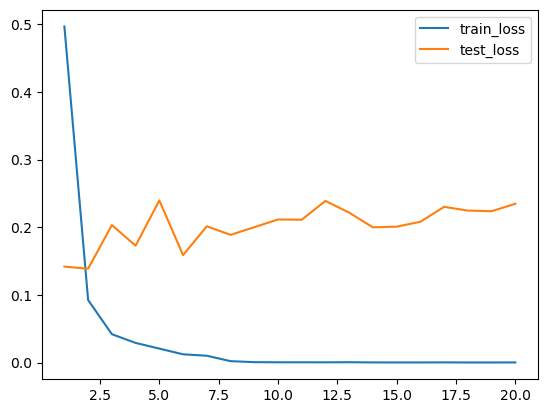

In [8]:
plt.plot(range(1, epochs+1), train_loss, label='train_loss')
plt.plot(range(1, epochs+1), test_loss, label='test_loss')
plt.legend()

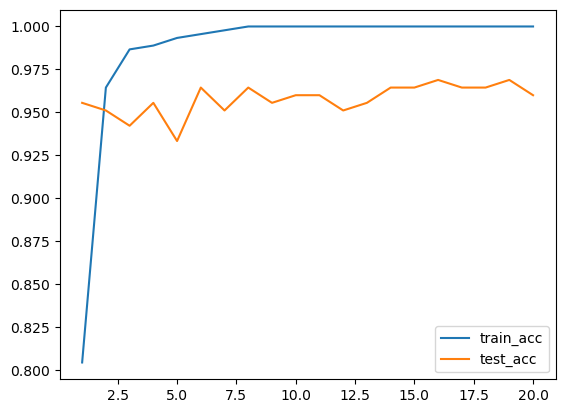

In [9]:
plt.plot(range(1, epochs+1), train_acc, label='train_acc')
plt.plot(range(1, epochs+1), test_acc, label='test_acc')
plt.legend()